### В данном уроке мы выделим еще несколько потенциально важных фичей из изначального датасета и попробуем применить изученные методы отбора признаков к итоговому датасету.

In [1]:
import numpy as np
import pandas as pd

processed_data = pd.read_csv('processed_data.csv', index_col='id')

processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
id,,,,,
id2875421,1,930.399753,0,1.500479,6.122493
id2377394,0,930.399753,0,1.807119,6.498282
id3858529,1,930.399753,0,6.392080,7.661527
id3504673,1,930.399753,0,1.487155,6.063785
id2181028,1,930.399753,0,1.189925,6.077642


In [2]:
initial_data = pd.read_csv('taxi_dataset.csv')

initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [3]:
initial_data.shape[0] == processed_data.shape[0]

True

In [4]:
### Вернем в датасет колонку pickup_datetime

initial_data = initial_data.set_index('id')

processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [5]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55


Напомним, **pickup_datetime** - время начала поездки.

Кажется, что в зависимости от месяца/дня недели/времени суток движение на дорогах может отличаться. Как из-за погодных условий, так и из-за загруженности транспорта. Поэтому, есть подозрение, что будет полезно выделить ряд признаков из колонки **pickup_datetime**. Давайте исследуем зависимость нашей таргетной переменной от указанных факторов.

In [6]:
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month

In [7]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


Исследуем, когда и сколько поездок было совершено.

Начнем с графиков, показывающих количество поездок в зависимости от времени суток/даты и т.д.

Так же полезно сразу показать и среднее значение таргетной переменной.

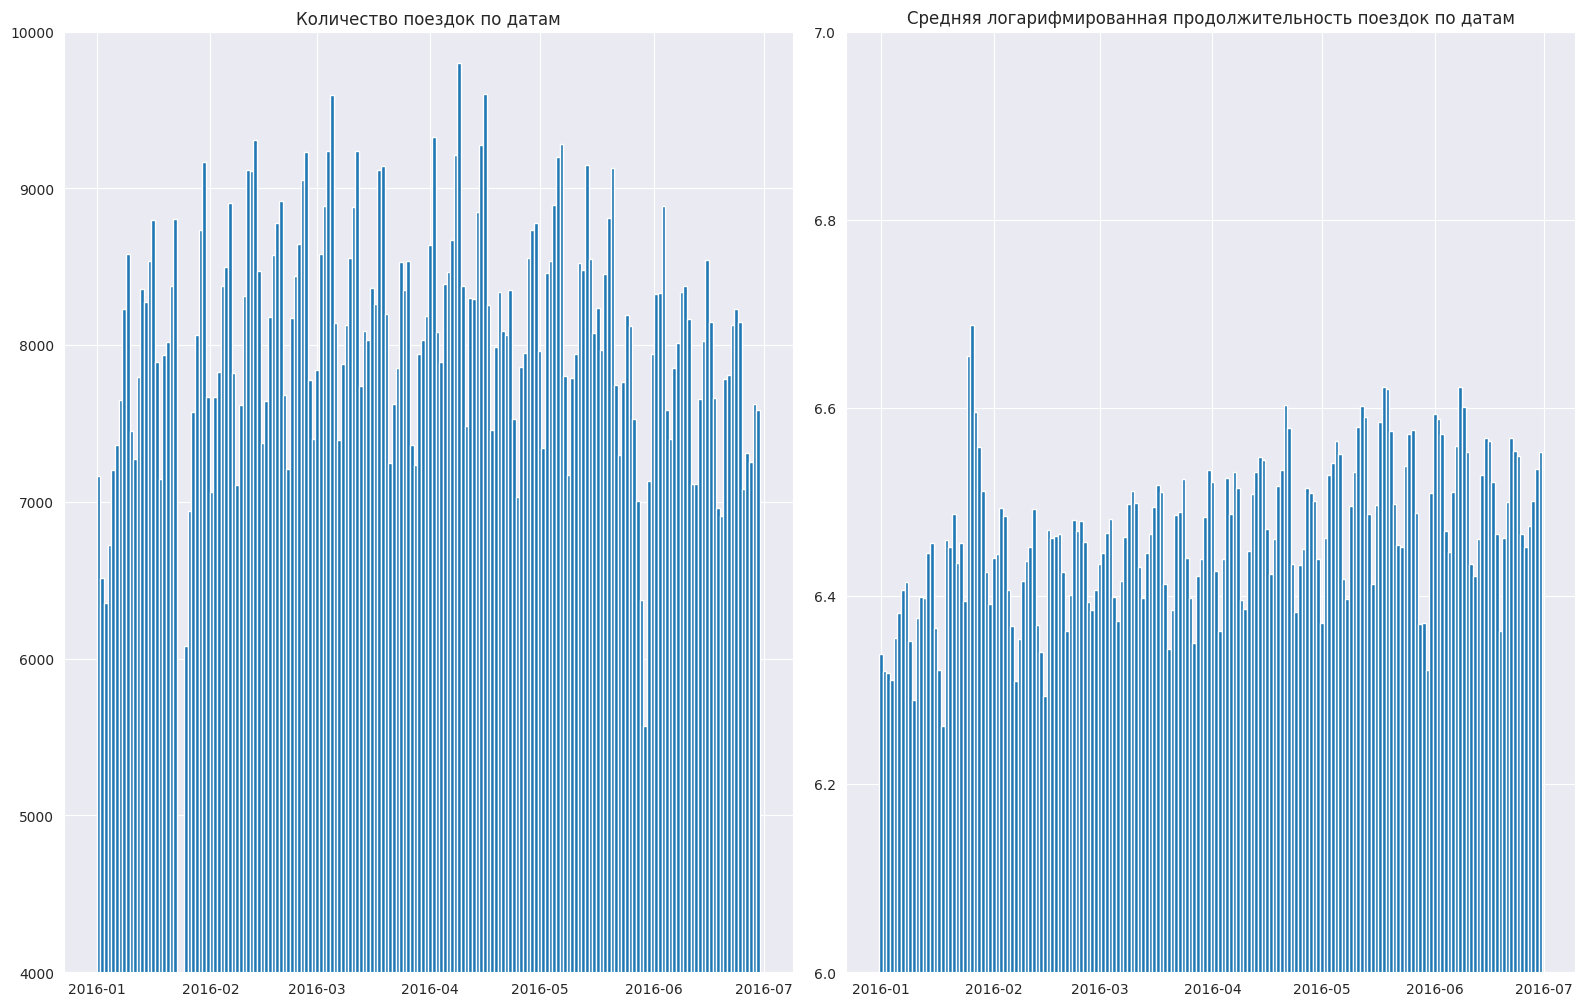

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['date'], bins=processed_data.date.unique().shape[0])
plt.ylim((4000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['date'].unique())), 
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по датам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по датам')

plt.show()

Кажется, что внутри недели есть некоторая зависимость таргета от дня недели. 

Такая же зависимость может оказаться и внутри дня (в завимости от часов).

Предлагаю исследовать эту зависимость подробнее.

Изобразите следующие графики зависимостей:

- Количество поездок/Средняя продолжительность поездки vs День недели
- Количество поездок/Средняя продолжительность поездки vs время суток
- Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
- Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
- Ящики с усами для различных: времени суток, дня недели, месяца

Используйте любые доступные инструменты pyplot!

Далее, на основе полученных результатов, мы будем принимать решение о создании новых признаков.

EDA можно использовать не только для того, чтобы понять, какие фичи можно убрать из датасета. Но и для выделения базовых признаков. Этим и займемся!

P.S. Сами графики мы проверять у Вас не будем. Зато для ответа на устные вопросы понадобятся, поэтому, в любом случае, крайне рекомендуем поупражняться. Поэтому рисовать все графики не обязательно - ограничьтесь теми, которые помогут Вам ответить на тестовые вопросы.

**Hint**: обратите внимание на сильную просадку в январе. Почему она могла произойти - можно прочитать <a href="https://en.wikipedia.org/wiki/January_2016_United_States_blizzard"> здесь</a>. В будущем можно будет создать бинарный признак "произошла ли поездка во время сильного снегопада".


In [9]:
### Your code is here
import matplotlib as mlp
import seaborn as sns

mlp.rcParams['lines.linewidth'] = 5
mlp.rcParams['xtick.major.size'] = 10
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 10
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 10
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 10
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 10
mlp.rcParams['axes.titlesize'] = 10
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'


In [10]:
import matplotlib.pyplot as plt
proc_copy = processed_data.copy(deep=True)
proc_copy['date'] = pd.to_datetime(proc_copy['date'])

In [11]:
proc_copy['weekday'] = proc_copy['pickup_datetime'].dt.dayofweek
proc_copy['month'] = proc_copy['pickup_datetime'].dt.month
proc_copy['hour'] = proc_copy['pickup_datetime'].dt.hour

In [12]:
day_mapping = {0: 'Понедельник',1: 'Вторник',2: 'Среда',3: 'Четверг',4: 'Пятница',5: 'Суббота',6: 'Воскресенье'}

In [13]:
week_drives = proc_copy.groupby(['weekday']).size().reset_index(name='drives_count')
week_duration = proc_copy.groupby(['weekday']).agg({'log_trip_duration': 'mean'}).reset_index()

month_drives = proc_copy.groupby(['month']).size().reset_index(name='drives_count')
month_duration = proc_copy.groupby(['month']).agg({'log_trip_duration': 'mean'}).reset_index()

hour_drives = proc_copy.groupby(['hour']).size().reset_index(name='drives_count')
hour_duration = proc_copy.groupby(['hour']).agg({'log_trip_duration': 'mean'}).reset_index()

week_drives['weekday'] = week_drives['weekday'].map(day_mapping)
week_duration['weekday'] = week_duration['weekday'].map(day_mapping)

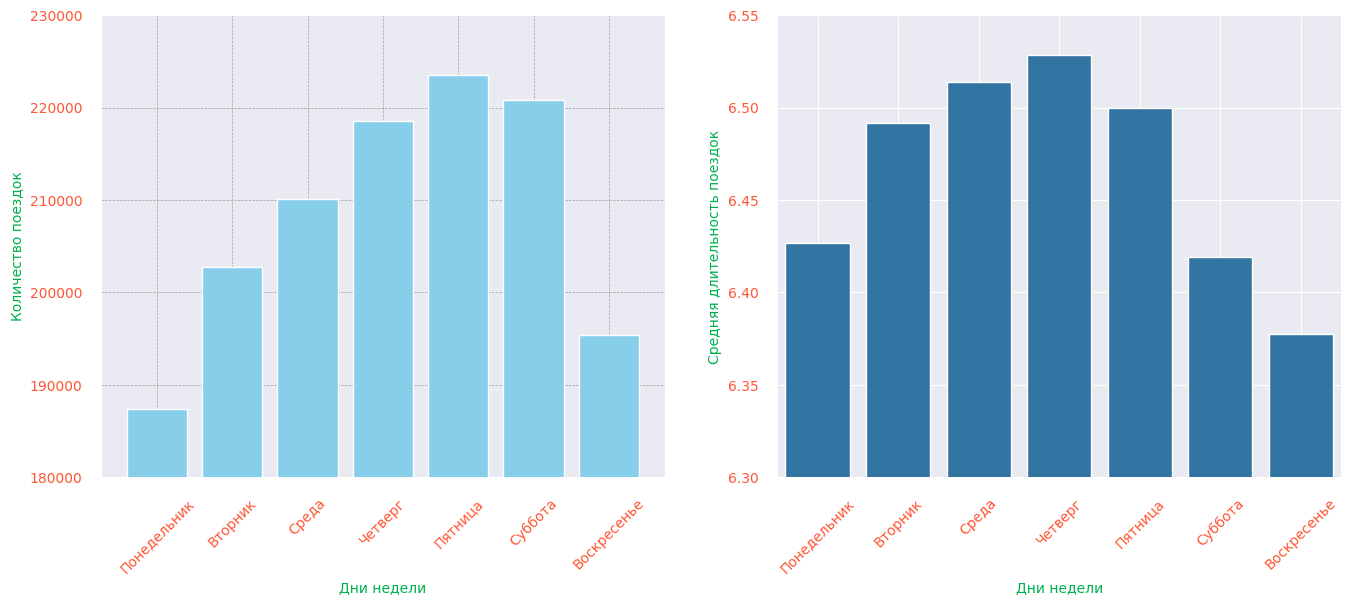

In [14]:
fig = plt.figure()

fig.set_size_inches(16, 6)

ax1 = fig.add_subplot(1,2,1) 
plt.bar( week_drives['weekday'], week_drives['drives_count'], color='skyblue', zorder=3)
plt.xlabel('Дни недели')
plt.ylabel('Количество поездок')
plt.xticks(rotation=45)
plt.ylim((180000, 230000))
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7, zorder=0)

ax2 = fig.add_subplot(1,2,2) 
sns.barplot(x='weekday', y='log_trip_duration', data=week_duration, zorder=3)
# plt.bar( week_duration['weekday'], week_duration['log_trip_duration'], color='skyblue', zorder=3)
plt.xlabel('Дни недели')
plt.ylabel('Средняя длительность поездок')
plt.ylim((6.3, 6.55))
plt.xticks(rotation=45)
plt.grid(True, zorder=0)
plt.show()

fig.tight_layout()

plt.show()

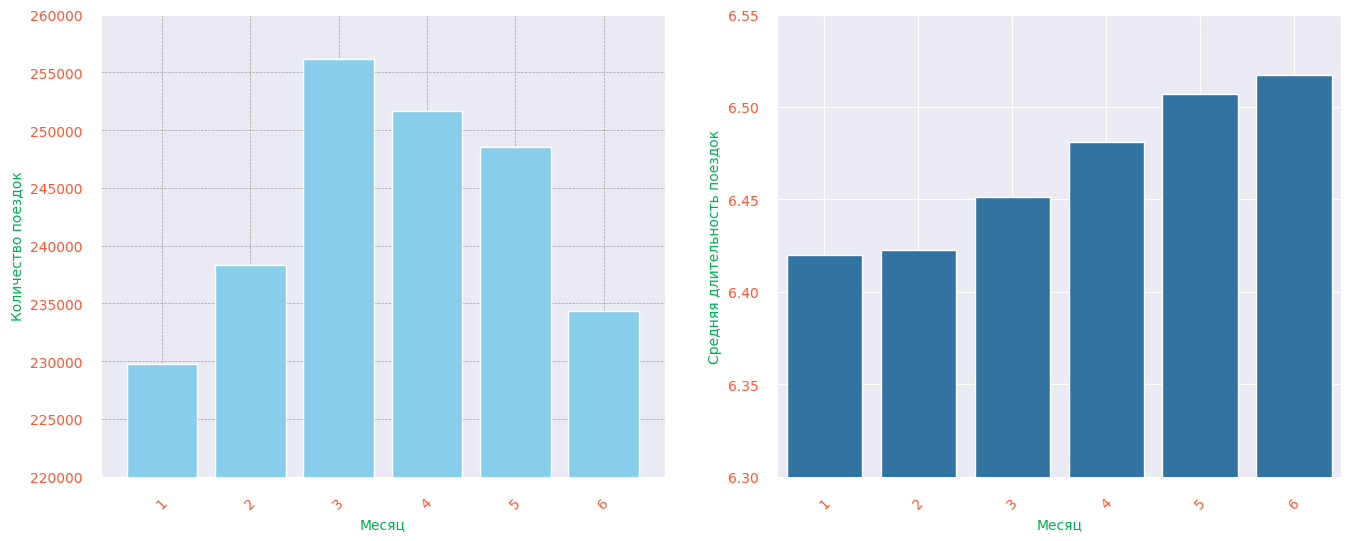

In [15]:
fig = plt.figure()

fig.set_size_inches(16, 6)

ax1 = fig.add_subplot(1,2,1) 
plt.bar( month_drives['month'], month_drives['drives_count'], color='skyblue', zorder=3)
plt.xlabel('Месяц')
plt.ylabel('Количество поездок')
plt.xticks(rotation=45)
plt.ylim((220000, 260000))
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7, zorder=0)

ax2 = fig.add_subplot(1,2,2) 
sns.barplot(x='month', y='log_trip_duration', data=month_duration, zorder=3)
# plt.bar( week_duration['weekday'], week_duration['log_trip_duration'], color='skyblue', zorder=3)
plt.xlabel('Месяц')
plt.ylabel('Средняя длительность поездок')
plt.ylim((6.3, 6.55))
plt.xticks(rotation=45)
plt.grid(True, zorder=0)
plt.show()

fig.tight_layout()

plt.show()

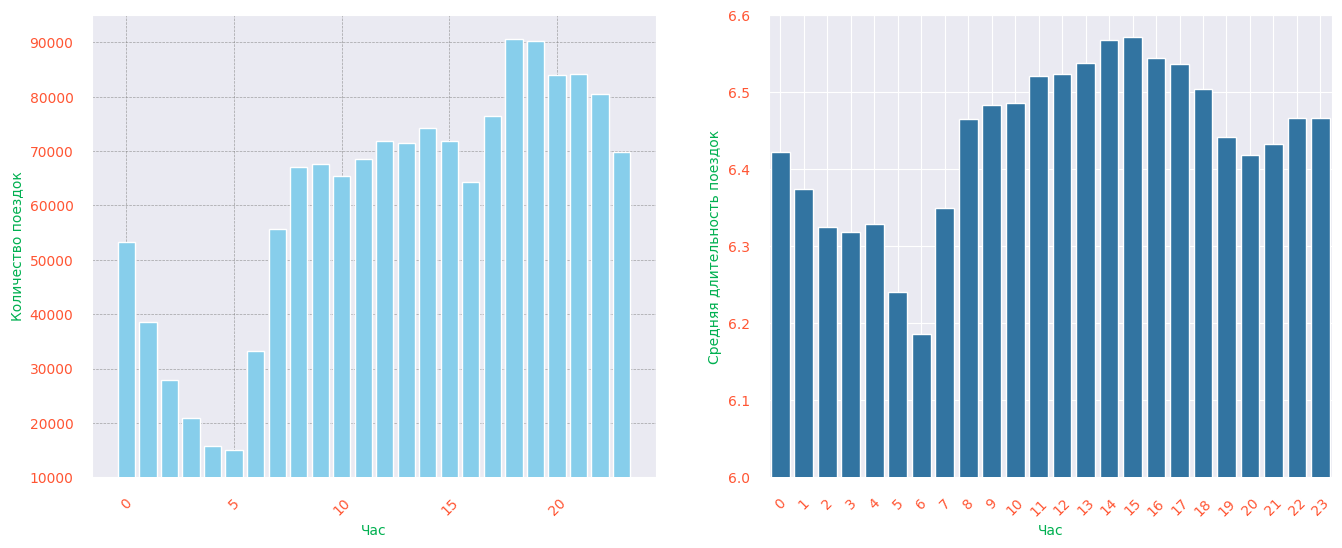

In [16]:
fig = plt.figure()

fig.set_size_inches(16, 6)

ax1 = fig.add_subplot(1,2,1) 
plt.bar( hour_drives['hour'], hour_drives['drives_count'], color='skyblue', zorder=3)
plt.xlabel('Час')
plt.ylabel('Количество поездок')
plt.xticks(rotation=45)
plt.ylim((10_000, 95_000))
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7, zorder=0)

ax2 = fig.add_subplot(1,2,2) 
sns.barplot(x='hour', y='log_trip_duration', data=hour_duration, zorder=3)
# plt.bar( week_duration['weekday'], week_duration['log_trip_duration'], color='skyblue', zorder=3)
plt.xlabel('Час')
plt.ylabel('Средняя длительность поездок')
plt.ylim((6, 6.6))
plt.xticks(rotation=45)
plt.grid(True, zorder=0)
plt.show()

fig.tight_layout()

plt.show()

In [17]:
drives_month_week = proc_copy.groupby(['month','weekday']).size().reset_index(name='count').pivot(index='month', columns='weekday', values='count')

In [18]:
drives_month_week.columns = day_mapping.values()

In [19]:
drives_month_week

,Понедельник,Вторник,Среда,Четверг,Пятница,Суббота,Воскресенье
month,,,,,,,
1,27231,29873,31314,32367,41470,34701,32751
2,36158,31106,32762,34707,35446,36367,31754
3,29967,39315,40949,42418,35585,36516,31439
4,29863,32538,33054,34164,43925,45855,32246
5,35465,39376,32642,33996,34016,34563,38429
6,28734,30541,39415,40922,33091,32866,28747


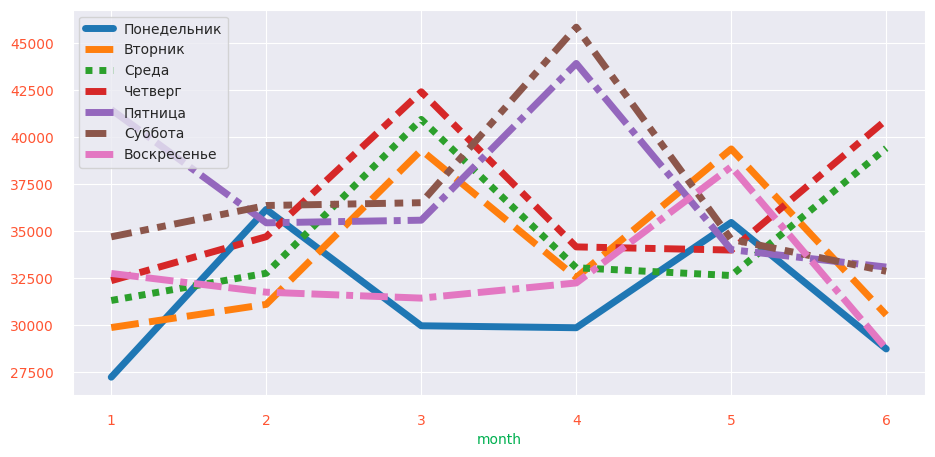

In [20]:
fig = plt.figure()
fig.set_size_inches(11, 5)
sns.lineplot(data=drives_month_week)
plt.show()

In [21]:
duration_month_week = proc_copy.groupby(['month','weekday']).agg({"log_trip_duration":"mean"}).reset_index().pivot(index='month', columns='weekday', values='log_trip_duration')

In [22]:
duration_month_week.columns = day_mapping.values()

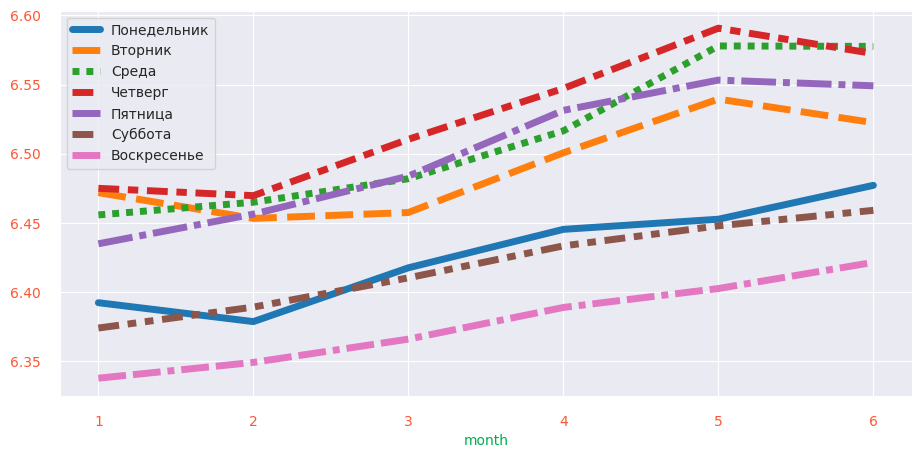

In [23]:
fig = plt.figure()
fig.set_size_inches(11, 5)
sns.lineplot(data=duration_month_week)
plt.show()

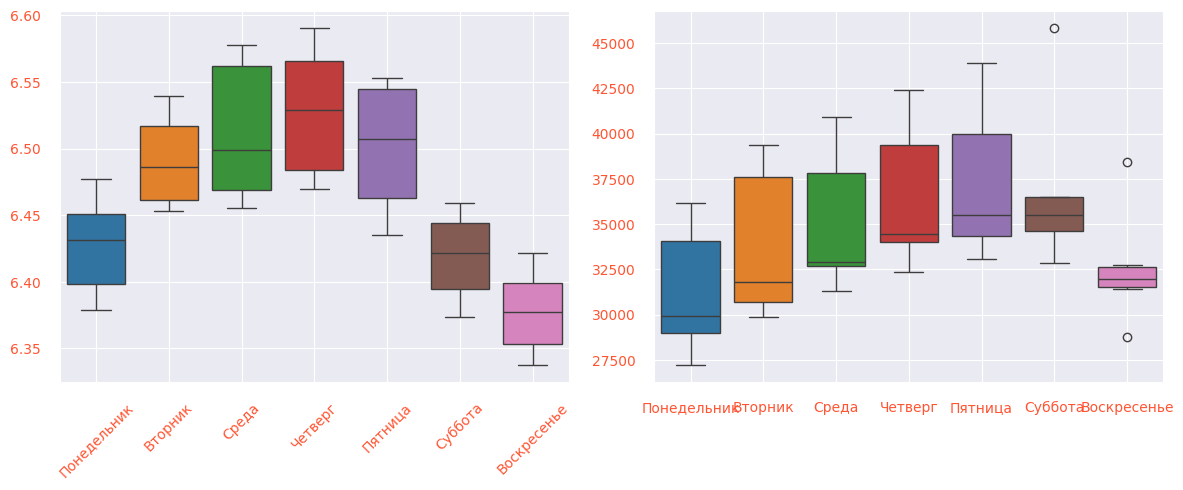

In [24]:
fig = plt.figure()
fig.set_size_inches(12, 5)

ax1 = fig.add_subplot(1, 2, 1)
sns.boxplot(data=duration_month_week)
plt.xticks(rotation=45)
plt.grid(True, zorder=0)
# plt.show()

ax2 = fig.add_subplot(1, 2, 2)
sns.boxplot(data=drives_month_week)
plt.grid(True, zorder=0)
# plt.show()


fig.tight_layout()
plt.show()


In [25]:
duration_week_hour = proc_copy.groupby(['weekday','hour']).agg({'log_trip_duration': 'mean'}).reset_index()

<Axes: xlabel='hour', ylabel='log_trip_duration'>

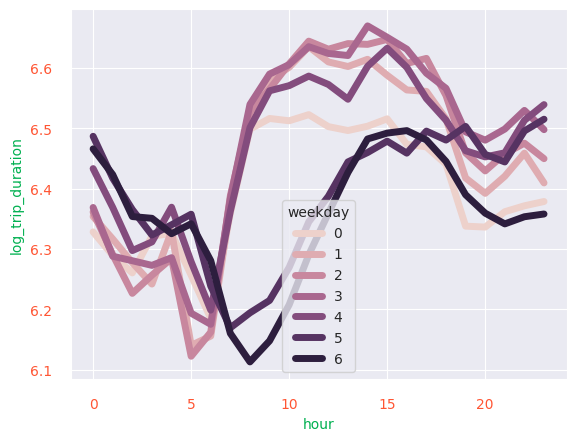

In [26]:
sns.lineplot(x='hour', y='log_trip_duration', data=duration_week_hour, hue='weekday')

In [27]:
duration_drives_week = proc_copy.groupby(['weekday']).agg({'log_trip_duration':'mean', 'date': 'count'}).reset_index()

<Axes: xlabel='date', ylabel='log_trip_duration'>

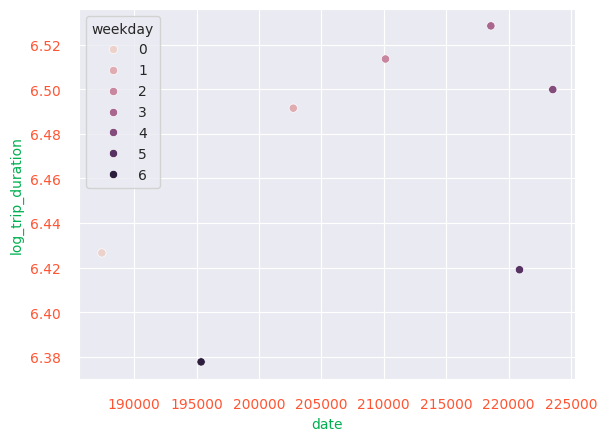

In [28]:
sns.scatterplot(data=duration_drives_week, x='date', y='log_trip_duration', hue='weekday')

Кажется, что полученные выводы из графиков выше достаточны для того, чтобы посчитать признаки, связанные с временем/датой поездки, достаточно важными. На их основе выделим еще пару.

Добавьте следующие бинарные признаки:


1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

P.S. назовите колонки **anomaly** и **traffic_jam**

In [29]:
### Создадим первый бинарный признак
proc_copy['day_number'] = proc_copy.pickup_datetime.dt.dayofyear

In [30]:
min_drives_day = proc_copy.groupby(['day_number']).size().reset_index(name='count')\
.sort_values(by=['count'])\
.iloc[0, 0]

In [31]:
proc_copy['anomaly'] = proc_copy.apply(lambda row: int(row.day_number == min_drives_day), axis=1 )

In [32]:
### Создадим второй бинарный признак
### Your code is here

In [33]:
top_duration = proc_copy.groupby(['weekday', 'hour']).agg({'log_trip_duration':'mean'}).reset_index()\
.sort_values(by=['log_trip_duration'], ascending=False)\
.iloc[:10, :2]

In [34]:
hash_dates = top_duration.apply(lambda row: str(row.weekday) + str(row.hour), axis=1).values

In [35]:
proc_copy['hash'] = proc_copy.apply(lambda row: str(row.weekday) + str(row.hour), axis=1)

In [36]:
proc_copy['traffic_jam'] = proc_copy['hash'].isin(hash_dates).astype(int)

Теперь колонки **pickup_datetime**, **date** можно убрать. А про оставшиеся **day_of_week**, **hour**, **month** необходимо подумать:

- С одной стороны, первые две можно убрать, так как на их основе была создана колонка **traffic_jam**
- С другой стороны, зависимость с колонкой **traffic_jam** нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть **day_of_week**, **hour** и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью OneHotEncoder. 
- Последняя (**month**) очевидно категориальная. Можно закодировать ее тоже через OneHotEncoder.

In [37]:
proc_copy = proc_copy.drop(columns=['pickup_datetime', 'date', 'weekday', 'hash', 'day_number'])

In [38]:
### Делаем OneHotEncoding и конкатим с processed_data

proc_copy = pd.get_dummies(proc_copy, columns=['day_of_week', 'hour', 'month'], drop_first=True, dtype=np.int8)
len(proc_copy.columns)

41

In [52]:
proc_copy.head().to_csv('4_step.csv', sep=',')

In [55]:
proc_copy.drop(columns=['predict', 'diff']).head().to_csv('4_step.csv', sep=',')

Что же, мы с Вами научились с помощью EDA визуализаций понимать важность признаков не только постфактум, но и до того, как сформировался финальный датасет - на этапе **выделения базовых фичей**.

Обратимся теперь к методам фильтрации - например, применим корреляционный анализ для одной пары фичей, чтобы понять, нет ли относительно этих колонок в нашем датасете избытка информации. 

Вспомним так же изначальные вещественные признаки - distance_km, passenger_count

Посчитайте корреляцию между ними. Есть ли какие-то основания для беспокойства?

In [39]:
### Your code is here
tmp = proc_copy.loc[:, ['distance_km', 'passenger_count', 'log_trip_duration']]


In [51]:
tmp.corr()

,distance_km,passenger_count,log_trip_duration
distance_km,1.000000,0.016596,0.573899
passenger_count,0.016596,1.000000,0.027069
log_trip_duration,0.573899,0.027069,1.000000


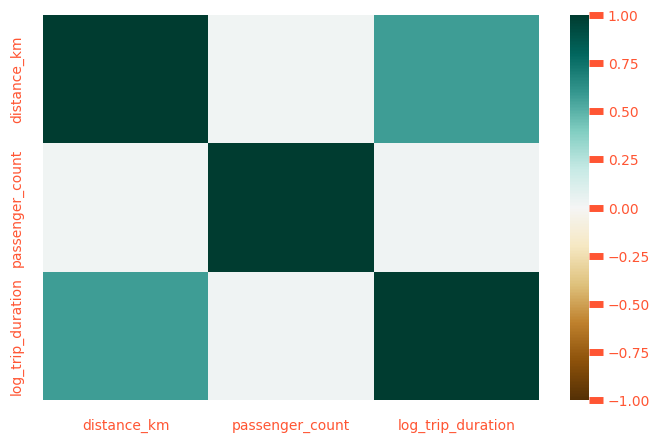

In [40]:

import seaborn as sns 

fig = plt.figure()
fig.set_size_inches(8, 5)

sns.heatmap(tmp.corr(),
            xticklabels=tmp.columns,
            yticklabels=tmp.columns,
            cmap='BrBG',
            vmin=-1,
            vmax=+1)

plt.show()

In [41]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


In [42]:
### На данный момент у нас 41 фича
### Представим, что хочется сократить их количество до 5.
### Воспользуемся для этим каким-нибудь методом обертки
### Например, метод прямого отбора

### Your code is here
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

# x = proc_copy.drop(columns=['log_trip_duration'])
# y = proc_copy.log_trip_duration
#
# model = LinearRegression()
#
# sfs = SequentialFeatureSelector(model, n_features_to_select=5)
# sfs.fit(x, y)

In [43]:
### Перечислите фичи, которые окажутся наиболее желанными
### Your code is here
# sfs.get_feature_names_out()

In [44]:
### Представим, что мы с Вами ничего не знаем про Кросс-Валидацию и отложенную выборку
### Замерьте качество линейной регрессии на данных фичах
### Сильно ли оно отличается от полученного на Кросс-Валидации в прошлом уроке в ДЗ?

sfs_names = ['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6']

### Your code is here
x = proc_copy.loc[:, sfs_names]
y = proc_copy.log_trip_duration

model = LinearRegression()
model.fit(x, y)


LinearRegression()

In [45]:
proc_copy['predict'] = model.predict(x)

In [46]:
proc_copy.loc[:, ['log_trip_duration', 'predict']]

,log_trip_duration,predict
id,,
id2875421,6.122493,6.275961
id2377394,6.498282,6.180325
id3858529,7.661527,6.978014
id3504673,6.063785,6.274530
id2181028,6.077642,6.242607
...,...,...
id2376096,6.658011,6.246513
id1049543,6.486161,6.636757
id2304944,6.639876,6.593876


In [47]:
proc_copy['diff'] = proc_copy.log_trip_duration - proc_copy.predict

In [49]:
proc_copy['diff'].mean()

np.float64(2.1880984782404233e-15)

In [50]:
from sklearn.metrics import mean_squared_error
mean_squared_error(proc_copy.log_trip_duration, proc_copy.predict)

0.41540002340782545